In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm
import random
import statistics
import time
from time import perf_counter

def generator(start, stop, min_, max_):
    # generates random numbers
    holder = []
    for num in range(min_, max_):
        holder.append(random.randint(start, stop))
    return holder


# node A
barnode_time_A = generator(0, 100, 1, 11)
barpersonel_A     = generator(1, 2, 1, 11)
node_A = ['A']*10

# node B
barnode_time_B = generator(0, 100, 1, 11)
barpersonel_B     = generator(2, 4, 1, 11)
node_B = ['B']*10

# pathway c
barnode_time_C = generator(0, 100, 1, 11)
barpersonel_C     = generator(2, 4, 1, 11)
node_C = ['C']*10

# node D
barnode_time_D = generator(0, 100, 1, 11)
barpersonel_D     = generator(2, 4, 1, 11)
node_D = ['D']*10


# node A
linenode_time_A = generator(0, 100, 1, 11)
linepersonel_A     = generator(1, 2, 1, 11)
node_A = ['A']*10

# node B
linenode_time_B = generator(0, 100, 1, 11)
linepersonel_B     = generator(2, 4, 1, 11)
node_B = ['B']*10

# pathway c
linenode_time_C = generator(0, 100, 1, 11)
linepersonel_C     = generator(2, 4, 1, 11)
node_C = ['C']*10

# node D
linenode_time_D = generator(0, 100, 1, 11)
linepersonel_D     = generator(2, 4, 1, 11)
node_D = ['D']*10



# pathway A
piecost = generator(15000, 100000, 1, 6)
piepathway = ['A', 'B', 'C', 'D', 'E']


# pathway B
barcost = generator(15000, 100000, 1, 6)
barpathway = ['A', 'B', 'C', 'D', 'E']


linebedtime = generator(60, 250, 1, 11)
lineyear = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

scatterbedtime = generator(60, 250, 1, 11)
scatteryear = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [11]:
df1 = pd.DataFrame(list(zip(node_A, barnode_time_A, barpersonel_A)),  columns=['node', 'node_time', 'personel',])
df2 = pd.DataFrame(list(zip(node_B, barnode_time_B, barpersonel_B)),  columns=['node', 'node_time', 'personel',])
df3 = pd.DataFrame(list(zip(node_C, barnode_time_C, barpersonel_C)),  columns=['node', 'node_time', 'personel',])
df4 = pd.DataFrame(list(zip(node_D, barnode_time_D, barpersonel_D)),  columns=['node', 'node_time', 'personel',])

frames = [df1, df2, df3, df4]
# result = pd.concat(frames).sample(frac=1).reset_index(drop=True)
result = pd.concat(frames).reset_index(drop=True)

In [12]:
# result

In [13]:
# result.plot(kind='bar', x='node', y= 'node_time')


In [14]:
avgA = statistics.mean(barnode_time_A)
avgB = statistics.mean(barnode_time_B)
avgC = statistics.mean(barnode_time_C)
avgD = statistics.mean(barnode_time_D)

barnode_avg_time = [avgA, avgB, avgC, avgD]
barnode = ['A', 'B', 'C', 'D']

ndf_avg = pd.DataFrame(list(zip(barnode, barnode_avg_time)),  columns=['node', 'node_avg_time',])

# find the largest node
# largestnode = max(node_avg_time)

# largestnode

if avgA > avgB and avgA > avgC and avgA > avgD:
    largestnode = 'A' 
elif avgB > avgA and avgB > avgC and avgB > avgD:
    largestnode = 'B' 
elif avgC > avgA and avgC > avgB and avgC > avgD:
    largestnode = 'C' 
elif avgD > avgA and avgD > avgB and avgD > avgC:
    largestnode = 'D' 

ndf_avg

node  node_avg_time
0    A           50.4
1    B           39.8
2    C           55.2
3    D           59.2

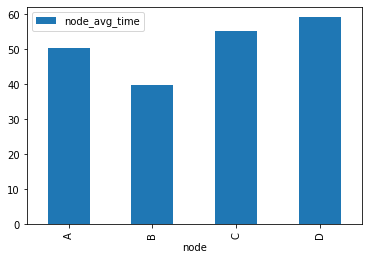

In [15]:
ndf_avg.plot(kind='bar', x='node', y= 'node_avg_time')
# plt.show(ndf)

In [16]:
personelavgA = statistics.mean(barpersonel_A)
personelavgB = statistics.mean(barpersonel_B)
personelavgC = statistics.mean(barpersonel_C)
personelavgD = statistics.mean(barpersonel_D)

barpersonel_avg = [personelavgA, personelavgB, personelavgC, personelavgD]
barnode = ['A', 'B', 'C', 'D']

ndf_personel = pd.DataFrame(list(zip(barnode, barpersonel_avg)),  columns=['node', 'personel_avg_time'])
ndf_personel

node  personel_avg_time
0    A                1.6
1    B                2.7
2    C                3.1
3    D                3.3

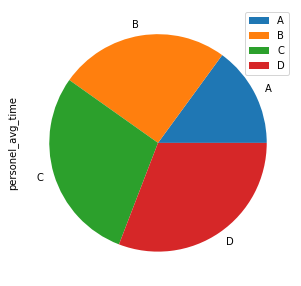

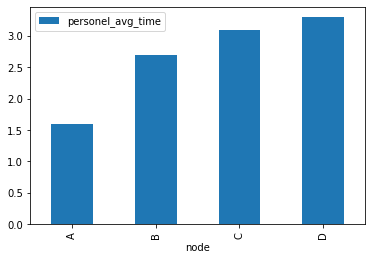

In [17]:
ndf_personel.set_index('node').plot.pie(y = 'personel_avg_time', figsize = (5,5))
ndf_personel.plot(kind='bar', x='node', y= 'personel_avg_time')

In [18]:
ndf_personel

node  personel_avg_time
0    A                1.6
1    B                2.7
2    C                3.1
3    D                3.3

In [19]:
finalgraph = pd.DataFrame(list(zip(barnode, barnode_avg_time, barpersonel_avg)),  columns=['node', 'node_avg_time', 'personel_avg'])
finalgraph.set_index('node').plot.bar(stacked=True)

In [20]:
finalgraph = pd.DataFrame(list(zip(barnode, barnode_avg_time, barpersonel_avg)),  columns=['node', 'node_avg_time', 'personel_avg'])


totalA = avgA + personelavgA
totalB = avgB + personelavgB
totalC = avgC + personelavgC
totalD = avgD + personelavgD

# largestnode

if totalA > totalB and totalA > totalC and totalA > totalD:
    greatestnode = 'A' 
elif totalB > totalA and totalB > totalC and totalB > totalD:
    greatestnode = 'B' 
elif totalC > totalA and totalC > totalB and totalC > totalD:
    greatestnode = 'C' 
elif totalD > totalA and totalD > totalB and totalD > totalC:
    greatestnode = 'D'


finalgraph


node  node_avg_time  personel_avg
0    A           50.4           1.6
1    B           39.8           2.7
2    C           55.2           3.1
3    D           59.2           3.3

In [25]:
lineavgA = statistics.mean(linenode_time_A)
lineavgB = statistics.mean(linenode_time_B)
lineavgC = statistics.mean(linenode_time_C)
lineavgD = statistics.mean(linenode_time_D)

linenode_avg_time = [lineavgA, lineavgB, lineavgC, lineavgD]
linenode = ['A', 'B', 'C', 'D']

line_avg = pd.DataFrame(list(zip(linenode, linenode_avg_time)),  columns=['node', 'node_avg_time',])

line_avg

node  node_avg_time
0    A           60.4
1    B           32.7
2    C           55.0
3    D           54.7

In [24]:
linepersonelavgA = statistics.mean(linepersonel_A)
linepersonelavgB = statistics.mean(linepersonel_B)
linepersonelavgC = statistics.mean(linepersonel_C)
linepersonelavgD = statistics.mean(linepersonel_D)

linepersonel_avg = [linepersonelavgA, linepersonelavgB, linepersonelavgC, linepersonelavgD]
linenode = ['A', 'B', 'C', 'D']

ndf_linepersonel = pd.DataFrame(list(zip(linenode, linepersonel_avg)),  columns=['node', 'personel_avg_time'])
ndf_linepersonel

node  personel_avg_time
0    A                1.3
1    B                3.4
2    C                3.3
3    D                3.2

In [26]:
linegraph = pd.DataFrame(list(zip(linenode, linenode_avg_time, linepersonel_avg)),  columns=['node', 'node_avg_time', 'personel_avg'])

linetotalA = lineavgA + linepersonelavgA
linetotalB = lineavgB + linepersonelavgB
linetotalC = lineavgC + linepersonelavgC
linetotalD = lineavgD + linepersonelavgD

if linetotalA > linetotalB and linetotalA > linetotalC and linetotalA > linetotalD:
    biggestnode = 'A' 
elif linetotalB > linetotalA and linetotalB > linetotalC and linetotalB > linetotalD:
    biggestnode = 'B' 
elif linetotalC > linetotalA and linetotalC > linetotalB and linetotalC > linetotalD:
    biggestnode = 'C' 
elif linetotalD > linetotalA and linetotalD > linetotalB and linetotalD > linetotalC:
    biggestnode = 'D' 


linegraph.set_index('node').plot.line()

In [27]:
linegraph.set_index('node').plot.area()

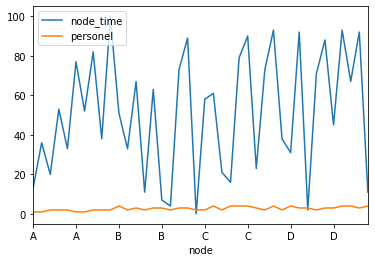

In [28]:
result.set_index('node').plot.line()

In [29]:
pietask2 = pd.DataFrame(list(zip(piepathway, piecost)),  columns=['pathway', 'cost'])


if piecost[0] > piecost[1] and piecost[0] > piecost[2] and piecost[0] > piecost[3] and piecost[0] > piecost[4]:
    biggestpie = 'A' 
elif piecost[1] > piecost[0] and piecost[1] > piecost[2] and piecost[1] > piecost[3] and piecost[1] > piecost[4]:
    biggestpie = 'B' 
elif piecost[2] > piecost[0] and piecost[2] > piecost[1] and piecost[2] > piecost[3] and piecost[2] > piecost[4]:
    biggestpie = 'C' 
elif piecost[3] > piecost[0] and piecost[3] > piecost[1] and piecost[3] > piecost[2] and piecost[3] > piecost[4]:
    biggestpie = 'D' 
elif piecost[4] > piecost[0] and piecost[4] > piecost[1] and piecost[4] > piecost[2] and piecost[4] > piecost[3]:
    biggestpie = 'E' 
    
    
pietask2

pathway   cost
0       A  80468
1       B  50005
2       C  99155
3       D  44466
4       E  53452

In [30]:
pietask2.set_index('pathway').plot.pie(y = 'cost', figsize = (5,5))


In [31]:
bartask2 = pd.DataFrame(list(zip(barpathway, barcost)),  columns=['pathway', 'cost'])


if barcost[0] > barcost[1] and barcost[0] > barcost[2] and barcost[0] > barcost[3] and barcost[0] > barcost[4]:
    biggestbar = 'A' 
elif barcost[1] > barcost[0] and barcost[1] > barcost[2] and barcost[1] > barcost[3] and barcost[1] > barcost[4]:
    biggestbar = 'B' 
elif barcost[2] > barcost[0] and barcost[2] > barcost[1] and barcost[2] > barcost[3] and barcost[2] > barcost[4]:
    biggestbar = 'C' 
elif barcost[3] > barcost[0] and barcost[3] > barcost[1] and barcost[3] > barcost[2] and barcost[3] > barcost[4]:
    biggestbar = 'D' 
elif barcost[4] > barcost[0] and barcost[4] > barcost[1] and barcost[4] > barcost[2] and barcost[4] > barcost[3]:
    biggestbar = 'E' 
    
bartask2

pathway   cost
0       A  28729
1       B  93170
2       C  71377
3       D  35082
4       E  64077

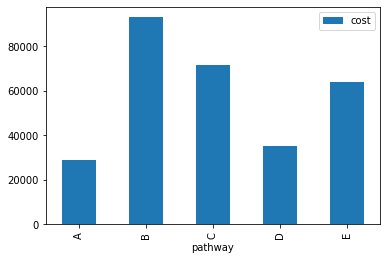

In [32]:
bartask2.plot(kind='bar', x='pathway', y= 'cost')

In [33]:
linetask3 = pd.DataFrame(list(zip(lineyear, linebedtime)),  columns=['year', 'bedtime'])
linetask3


year  bedtime
0  2010       83
1  2011      163
2  2012      112
3  2013      119
4  2014      152
5  2015      135
6  2016      206
7  2017       95
8  2018      124
9  2019      187

In [34]:
diff1 = linebedtime[0] - linebedtime[1]
diff2 = linebedtime[1] - linebedtime[2]
diff3 = linebedtime[2] - linebedtime[3]
diff4 = linebedtime[3] - linebedtime[4]
diff5 = linebedtime[4] - linebedtime[5]
diff6 = linebedtime[5] - linebedtime[6]
diff7 = linebedtime[6] - linebedtime[7]
diff8 = linebedtime[7] - linebedtime[8]
diff9 = linebedtime[8] - linebedtime[9]

if diff1 < diff2 and diff1 < diff3 and diff1 < diff4 and diff1 < diff5 and diff1 < diff6 and diff1 < diff7 and diff1 < diff8 and diff1 < diff9:
    largesttime = 'A' 
elif diff2 < diff1 and diff2 < diff3 and diff2 < diff4 and diff2 < diff5 and diff2 < diff6 and diff2 < diff7 and diff2 < diff8 and diff2 < diff9:
    largesttime = 'B' 
elif diff3 < diff1 and diff3 < diff2 and diff3 < diff4 and diff3 < diff5 and diff3 < diff6 and diff3 < diff7 and diff3 < diff8 and diff3 < diff9:
    largesttime = 'C' 
elif diff4 < diff1 and diff4 < diff2 and diff4 < diff3 and diff4 < diff5 and diff4 < diff6 and diff4 < diff7 and diff4 < diff8 and diff4 < diff9:
    largesttime = 'D' 
elif diff5 < diff1 and diff5 < diff2 and diff5 < diff3 and diff5 < diff4 and diff5 < diff6 and diff5 < diff7 and diff5 < diff8 and diff5 < diff9:
    largesttime = 'E' 
elif diff6 < diff1 and diff6 < diff2 and diff6 < diff3 and diff6 < diff4 and diff6 < diff5 and diff6 < diff7 and diff6 < diff8 and diff6 < diff9:
    largesttime = 'F' 
elif diff7 < diff1 and diff7 < diff2 and diff7 < diff3 and diff7 < diff4 and diff7 < diff5 and diff7 < diff6 and diff7 < diff8 and diff7 < diff9:
    largesttime = 'G' 
elif diff8 < diff1 and diff8 < diff2 and diff8 < diff3 and diff8 < diff4 and diff8 < diff5 and diff8 < diff6 and diff8 < diff7 and diff8 < diff9:
    largesttime = 'H' 
elif diff9 < diff1 and diff9 < diff2 and diff9 < diff3 and diff9 < diff4 and diff9 < diff5 and diff9 < diff6 and diff9 < diff7 and diff9 < diff8:
    largesttime = 'I' 


linetask3.set_index('year').plot.line()


largesttime

'A'

In [35]:
scattertask3 = pd.DataFrame(list(zip(scatteryear, scatterbedtime)),  columns=['year', 'bedtime'])
scattertask3

year  bedtime
0  2010      238
1  2011      158
2  2012       66
3  2013       82
4  2014      112
5  2015      218
6  2016      103
7  2017       63
8  2018       77
9  2019      119

'E'

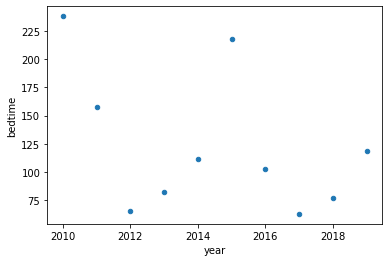

In [36]:
ndiff1 = scatterbedtime[0] - scatterbedtime[1]
ndiff2 = scatterbedtime[1] - scatterbedtime[2]
ndiff3 = scatterbedtime[2] - scatterbedtime[3]
ndiff4 = scatterbedtime[3] - scatterbedtime[4]
ndiff5 = scatterbedtime[4] - scatterbedtime[5]
ndiff6 = scatterbedtime[5] - scatterbedtime[6]
ndiff7 = scatterbedtime[6] - scatterbedtime[7]
ndiff8 = scatterbedtime[7] - scatterbedtime[8]
ndiff9 = scatterbedtime[8] - scatterbedtime[9]

if ndiff1 < ndiff2 and ndiff1 < ndiff3 and ndiff1 < ndiff4 and ndiff1 < ndiff5 and ndiff1 < ndiff6 and ndiff1 < ndiff7 and ndiff1 < ndiff8 and ndiff1 < ndiff9:
    scattertime = 'A' 
elif ndiff2 < ndiff1 and ndiff2 < ndiff3 and ndiff2 < ndiff4 and ndiff2 < ndiff5 and ndiff2 < ndiff6 and ndiff2 < ndiff7 and ndiff2 < ndiff8 and ndiff2 < ndiff9:
    scattertime = 'B' 
elif ndiff3 < ndiff1 and ndiff3 < ndiff2 and ndiff3 < ndiff4 and ndiff3 < ndiff5 and ndiff3 < ndiff6 and ndiff3 < ndiff7 and ndiff3 < ndiff8 and ndiff3 < ndiff9:
    scattertime = 'C' 
elif ndiff4 < ndiff1 and ndiff4 < ndiff2 and ndiff4 < ndiff3 and ndiff4 < ndiff5 and ndiff4 < ndiff6 and ndiff4 < ndiff7 and ndiff4 < ndiff8 and ndiff4 < ndiff9:
    scattertime = 'D' 
elif ndiff5 < ndiff1 and ndiff5 < ndiff2 and ndiff5 < ndiff3 and ndiff5 < ndiff4 and ndiff5 < ndiff6 and ndiff5 < ndiff7 and ndiff5 < ndiff8 and ndiff5 < ndiff9:
    scattertime = 'E' 
elif ndiff6 < ndiff1 and ndiff6 < ndiff2 and ndiff6 < ndiff3 and ndiff6 < ndiff4 and ndiff6 < ndiff5 and ndiff6 < ndiff7 and ndiff6 < ndiff8 and ndiff6 < ndiff9:
    scattertime = 'F' 
elif ndiff7 < ndiff1 and ndiff7 < ndiff2 and ndiff7 < ndiff3 and ndiff7 < ndiff4 and ndiff7 < ndiff5 and ndiff7 < ndiff6 and ndiff7 < ndiff8 and ndiff7 < ndiff9:
    scattertime = 'G' 
elif ndiff8 < ndiff1 and ndiff8 < ndiff2 and ndiff8 < ndiff3 and ndiff8 < ndiff4 and ndiff8 < ndiff5 and ndiff8 < ndiff6 and ndiff8 < ndiff7 and ndiff8 < ndiff9:
    scattertime = 'H' 
elif ndiff9 < ndiff1 and ndiff9 < ndiff2 and ndiff9 < ndiff3 and ndiff9 < ndiff4 and ndiff9 < ndiff5 and ndiff9 < ndiff6 and ndiff9 < ndiff7 and ndiff9 < ndiff8:
    scattertime = 'I' 


scattertask3.plot.scatter(x = 'year', y = 'bedtime')

scattertime

------Hello and Welcome-------
Thank you for participating in this experiment 

Kindly follow all the instructions provided and you can complete this under 10 minutes
Please enter your name:Uwem Ekwere


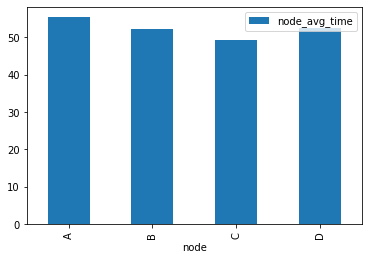

what is the largest pathway node: a
correct

In the next part, you will be asked to answer a couple of questions
please answer them to the best of your ability and as quickly as you can
After answering the first question, you will be given a 5 second pause before the second question is displayed
You can either choose from A, B, C or D,
If you are ready type yes, if not take as much time as you need: yes


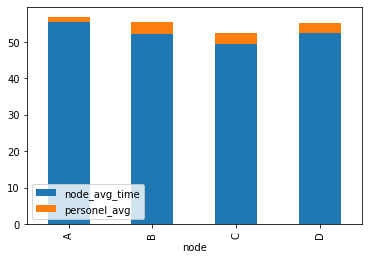

what is the highest pathway node in this bar graph: a
correct
The area chart below represents two variables, the average time spent on a node and the number of staff being used at that particular node
You can choose from either node A, B, C, or D
If you are ready type yes, if not take as much time as you need: yes


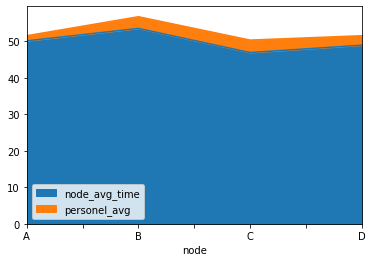

what node has the highest tame taken: b
correct
Congratulations on completing the first task in this experiment. We will now move on to task 2
In this task two different charts will be displayed, one after the other
You have to answer the question for the first graph before the second graph is displayed
After answering the first question you will have 5 seconds before the second graph is displayed
For both questions please type either A, B ,C, D or E
If you are ready to proceed please type yes: yes


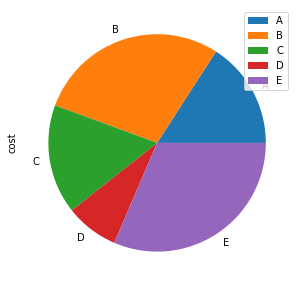

what pathway has the largest pie slice: e
correct


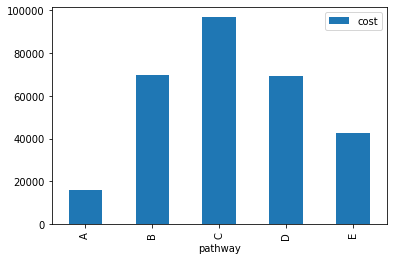

what pathway has the largest bar: c
correct
You have now completed the second task in this experiment
It is now time to complete the third and final task in this experiment
The display of tasks will take a similar form to that of task 2, two charts will be displayed one after the other
The second chart will be displayed after you have answered the question for the first chart.
The second chart will appear 5 seconds after you input the answer for the first question
Both charts are going to display the average amount of time patients spend on beds in A&E for each year from 2010-2019
For this task you will be asked to identify which to consecutive years saw the greatest increase in patients bedtimes
To complete this task you are going to need the following key 
2010-2011 = A
2011-2012 = B
2012-2013 = C
2013-2014 = D
2014-2015 = E
2015-2016 = F
2016-2017 = G
2017-2018 = H
2018-2019 = I 

For example, if you answer is 2013-2014, simply input D
If you are ready to proceed please type yes: ye

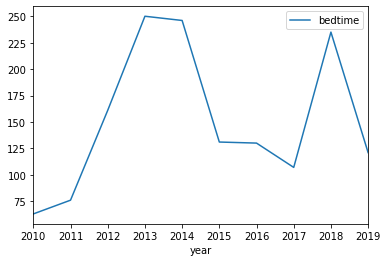

what two consecutive years saw the greatest increase in times spent on beds by patients: h
correct


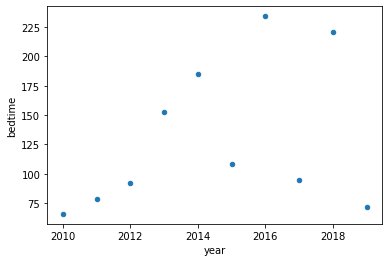

what two consecutive years saw the greatest increase in times spent on beds by patients: h
incorrect
You have now come to the end of the experiment
Thank you for your participation


In [62]:
print('------Hello and Welcome-------')
print('Thank you for participating in this experiment \n')
print('Kindly follow all the instructions provided and you can complete this under 10 minutes')
name2 = input('Please enter your name:')
ndf_avg.plot(kind='bar', x='node', y= 'node_avg_time')
plt.show()
ans1 = input('what is the largest pathway node: ')

if ans1.upper() == largestnode:
    print('correct')
else:
    print('incorrect')
    
    
print('\nIn the next part, you will be asked to answer a couple of questions')
print('please answer them to the best of your ability and as quickly as you can')
print('After answering the first question, you will be given a 5 second pause before the second question is displayed')
print('You can either choose from A, B, C or D,')
syntax = input('If you are ready type yes, if not take as much time as you need: ')  
finalgraph.set_index('node').plot.bar(stacked=True)
plt.show()
ans2_starttime = perf_counter()
ans2 = input('what is the highest pathway node in this bar graph: ')

ans2_endtime = perf_counter()

ans2_time = (ans2_endtime - ans2_starttime)
round_ans2_time = round(ans2_time,3)

if ans2.upper() == greatestnode:
    print('correct')
    f = open("answers.txt", "a")
    f.write("TASK1a :" + name2 + ", correct  , " + str(round_ans2_time) + "\n")
    f.close()
else:
    print('incorrect')
    f = open("answers.txt", "a")
    f.write("task1a :" + name2 + ", incorrect, " + str(round_ans2_time) + "\n")
    f.close()

time.sleep(5)
    
print('The area chart below represents two variables, the average time spent on a node and the number of staff being used at that particular node')
print('You can choose from either node A, B, C, or D')
syntax2 = input('If you are ready type yes, if not take as much time as you need: ') 
linegraph.set_index('node').plot.area()
plt.show()
ans3_starttime = perf_counter()
ans3= input('what node has the highest tame taken: ')
ans3_endtime = perf_counter()

ans3_time = (ans3_endtime - ans3_starttime)
round_ans3_time = round(ans3_time,3)

if ans3.upper()== biggestnode:
    print('correct')
    f = open("answers.txt", "a")
    f.write("TASK1b :" + name2 + ", correct  , " + str(round_ans3_time) + "\n")
    f.close()
else:
    print('incorrect')
    f = open("answers.txt", "a")
    f.write("task1b :" + name2 + ", incorrect, " + str(round_ans3_time) + "\n")
    f.close()
    
    
print('Congratulations on completing the first task in this experiment. We will now move on to task 2')
print('In this task two different charts will be displayed, one after the other')
print('You have to answer the question for the first graph before the second graph is displayed')
print('After answering the first question you will have 5 seconds before the second graph is displayed')
print('For both questions please type either A, B ,C, D or E')
syntax3 = input('If you are ready to proceed please type yes: ')
pietask2.set_index('pathway').plot.pie(y = 'cost', figsize = (5,5))
plt.show()
ans4_starttime = perf_counter()
ans4= input('what pathway has the largest pie slice: ')
ans4_endtime = perf_counter()

ans4_time = (ans4_endtime - ans4_starttime)
round_ans4_time = round(ans4_time,3)

if ans4.upper()== biggestpie:
    print('correct')
    f = open("answers.txt", "a")
    f.write("TASK2a :" + name2 + ", correct  , " + str(round_ans4_time) + "\n")
    f.close()
else:
    print('incorrect')
    f = open("answers.txt", "a")
    f.write("task2a :" + name2 + ", incorrect, " + str(round_ans4_time) + "\n")
    f.close()

time.sleep(5)

bartask2.plot(kind='bar', x='pathway', y= 'cost')
plt.show()
ans5_starttime = perf_counter()
ans5= input('what pathway has the largest bar: ')
ans5_endtime = perf_counter()

ans5_time = (ans5_endtime - ans5_starttime)
round_ans5_time = round(ans5_time,3)

if ans5.upper()== biggestbar:
    print('correct')
    f = open("answers.txt", "a")
    f.write("TASK2b :" + name2 + ", correct  , " + str(round_ans5_time) + "\n")
    f.close()
else:
    print('incorrect') 
    f = open("answers.txt", "a")
    f.write("task2b :" + name2 + ", incorrect, " + str(round_ans5_time) + "\n")
    f.close()
    
time.sleep(5)
    
    
print('You have now completed the second task in this experiment')
print('It is now time to complete the third and final task in this experiment')
print('The display of tasks will take a similar form to that of task 2, two charts will be displayed one after the other')
print('The second chart will be displayed after you have answered the question for the first chart.')
print('The second chart will appear 5 seconds after you input the answer for the first question')
print('Both charts are going to display the average amount of time patients spend on beds in A&E for each year from 2010-2019')
print('For this task you will be asked to identify which to consecutive years saw the greatest increase in patients bedtimes')
print('To complete this task you are going to need the following key ')
print('2010-2011 = A')
print('2011-2012 = B')
print('2012-2013 = C')
print('2013-2014 = D')
print('2014-2015 = E')
print('2015-2016 = F')
print('2016-2017 = G')
print('2017-2018 = H')
print('2018-2019 = I \n')
print('For example, if you answer is 2013-2014, simply input D')
syntax3 = input('If you are ready to proceed please type yes: ')
linetask3.set_index('year').plot.line()
plt.show()
ans6_starttime = perf_counter()
ans6= input('what two consecutive years saw the greatest increase in times spent on beds by patients: ')
ans6_endtime = perf_counter()

ans6_time = (ans6_endtime - ans6_starttime)
round_ans6_time = round(ans6_time,3)

if ans6.upper()== largesttime:
    print('correct')
    f = open("answers.txt", "a")
    f.write("TASK3a :" + name2 + ", correct  , " + str(round_ans6_time) + "\n")
    f.close()
else:
    print('incorrect') 
    f = open("answers.txt", "a")
    f.write("task3a :" + name2 + ", incorrect, " + str(round_ans6_time) + "\n")
    f.close()
time.sleep(5)

scattertask3.plot.scatter(x = 'year', y = 'bedtime')
plt.show()

ans7_starttime = perf_counter()
ans7= input('what two consecutive years saw the greatest increase in times spent on beds by patients: ')
ans7_endtime = perf_counter()

ans7_time = (ans7_endtime - ans7_starttime)
round_ans7_time = round(ans7_time,3)
            
if ans7.upper() == scattertime:
    print('correct')
    f = open("answers.txt", "a")
    f.write("TASK3b :" + name2 + ", correct  , " + str(round_ans7_time) + "\n")
    f.close()
else:
    print('incorrect') 
    f = open("answers.txt", "a")
    f.write("task3b :" + name2 + ", incorrect, " + str(round_ans7_time) + "\n")
    f.close()

print('You have now come to the end of the experiment')
print('Thank you for your participation')
